# Predicting WIn Shares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from operator import itemgetter

In [2]:
nba_data = pd.read_csv('NBA_2018-2019.csv')

In [3]:
nba_data.head()

,Player,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Álex Abrines,25,OKC,31,588,6.3,0.507,0.809,0.083,0.9,...,7.9,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2
1,Quincy Acy,28,PHO,10,123,2.9,0.379,0.833,0.556,2.7,...,15.2,9.2,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1
2,Jaylen Adams,22,ATL,34,428,7.6,0.474,0.673,0.082,2.6,...,19.7,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3
3,Steven Adams,25,OKC,80,2669,18.5,0.591,0.002,0.361,14.7,...,12.6,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2
4,Bam Adebayo,21,MIA,82,1913,17.9,0.623,0.031,0.465,9.2,...,17.1,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4


In [4]:
nba_data.shape

(708, 25)

In [5]:
nba_data.dtypes
# This is the glossary that explains the acronym https://www.basketball-reference.com/about/glossary.html

Player     object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [6]:
nba_data = nba_data.drop(['Tm',  'OWS', 'DWS', 'WS/48'], axis=1)
# Tm and Pos are catergorical variables and doesn't matter for the objective
# OWS, DWS, and WS/48 are part of the equation for WS. So it would be pointless. 

In [7]:
nba_data.columns

Index(['Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'WS', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

In [8]:
nba_data.head()

,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,AST%,STL%,BLK%,TOV%,USG%,WS,OBPM,DBPM,BPM,VORP
0,Álex Abrines,25,31,588,6.3,0.507,0.809,0.083,0.9,7.8,...,4.3,1.3,0.9,7.9,12.2,0.6,-2.4,-0.9,-3.4,-0.2
1,Quincy Acy,28,10,123,2.9,0.379,0.833,0.556,2.7,20.1,...,8.2,0.4,2.7,15.2,9.2,-0.1,-5.7,-0.3,-5.9,-0.1
2,Jaylen Adams,22,34,428,7.6,0.474,0.673,0.082,2.6,12.3,...,19.8,1.5,1.0,19.7,13.5,0.1,-3.1,-1.3,-4.4,-0.3
3,Steven Adams,25,80,2669,18.5,0.591,0.002,0.361,14.7,14.8,...,6.6,2.0,2.4,12.6,16.4,9.1,0.6,2.1,2.7,3.2
4,Bam Adebayo,21,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,...,14.2,1.8,3.0,17.1,15.8,6.8,-0.6,3.6,3.0,2.4


In [9]:
nba_data.isnull().sum()*100/nba_data.isnull().count()
# To check any nulls

Player    0.000000
Age       0.000000
G         0.000000
MP        0.000000
PER       0.000000
TS%       0.847458
3PAr      0.847458
FTr       0.847458
ORB%      0.000000
DRB%      0.000000
TRB%      0.000000
AST%      0.000000
STL%      0.000000
BLK%      0.000000
TOV%      0.847458
USG%      0.000000
WS        0.000000
OBPM      0.000000
DBPM      0.000000
BPM       0.000000
VORP      0.000000
dtype: float64

In [10]:
nba_data["TS%"].fillna(0, inplace =True)
nba_data["3PAr"].fillna(0, inplace =True)
nba_data["FTr"].fillna(0, inplace =True)
nba_data["TOV%"].fillna(0, inplace =True)
# Filled in the null with 0 since it's less than 1% null.

In [11]:
nba_data.isnull().sum()*100/nba_data.isnull().count()

Player    0.0
Age       0.0
G         0.0
MP        0.0
PER       0.0
TS%       0.0
3PAr      0.0
FTr       0.0
ORB%      0.0
DRB%      0.0
TRB%      0.0
AST%      0.0
STL%      0.0
BLK%      0.0
TOV%      0.0
USG%      0.0
WS        0.0
OBPM      0.0
DBPM      0.0
BPM       0.0
VORP      0.0
dtype: float64

In [12]:
nba_data.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,OBPM,DBPM,BPM,VORP
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,26.142655,42.882768,972.257062,12.745763,0.526973,0.376839,0.247192,4.979802,15.169068,10.071893,13.028107,1.484322,1.590960,11.919633,18.490678,1.968220,-1.511017,-0.578672,-2.091525,0.442514
std,4.141178,26.282043,802.770673,7.350963,0.123061,0.221680,0.178127,5.956338,8.297935,5.763570,8.953723,0.995191,1.662236,5.663598,5.686523,2.514443,4.165931,2.480814,5.320754,1.181068
min,19.000000,1.000000,1.000000,-38.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-36.100000,-20.500000,-52.300000,-2.200000
25%,23.000000,19.000000,245.250000,9.300000,0.499000,0.249250,0.153000,1.900000,9.900000,6.200000,7.100000,1.000000,0.500000,8.900000,15.000000,0.200000,-2.900000,-1.700000,-4.000000,-0.100000
50%,26.000000,44.000000,788.000000,12.400000,0.543500,0.388000,0.223000,3.300000,13.400000,8.700000,10.600000,1.400000,1.200000,11.500000,17.800000,1.100000,-1.250000,-0.600000,-1.700000,0.000000
75%,29.000000,68.000000,1579.500000,16.200000,0.581000,0.530000,0.309250,7.000000,19.200000,12.850000,17.325000,1.825000,2.125000,14.400000,21.800000,2.800000,0.125000,0.800000,0.200000,0.600000
max,42.000000,82.000000,3028.000000,80.400000,1.500000,1.000000,2.000000,100.000000,90.300000,51.600000,73.400000,12.300000,14.800000,50.000000,47.200000,15.200000,38.200000,8.500000,44.900000,9.900000


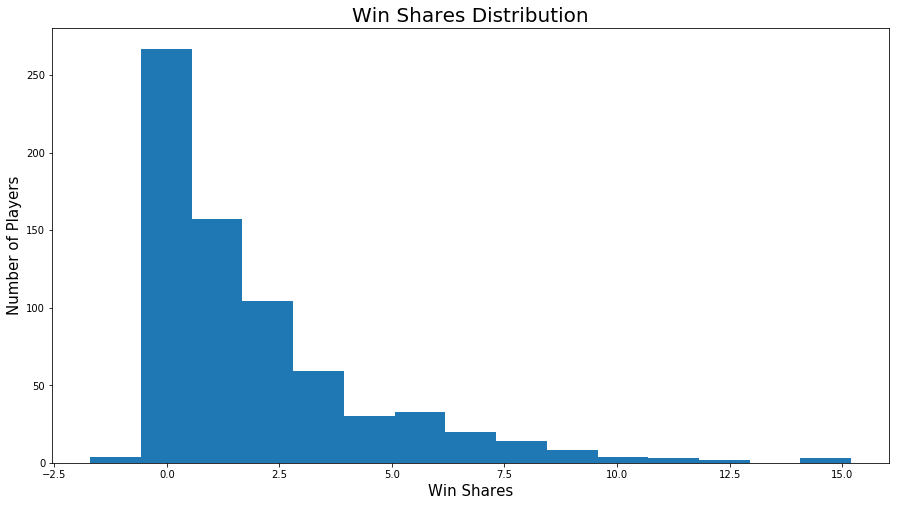

In [13]:
plt.figure(figsize = (15,8))
plt.hist(nba_data['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);
# To check what the distibution looks like

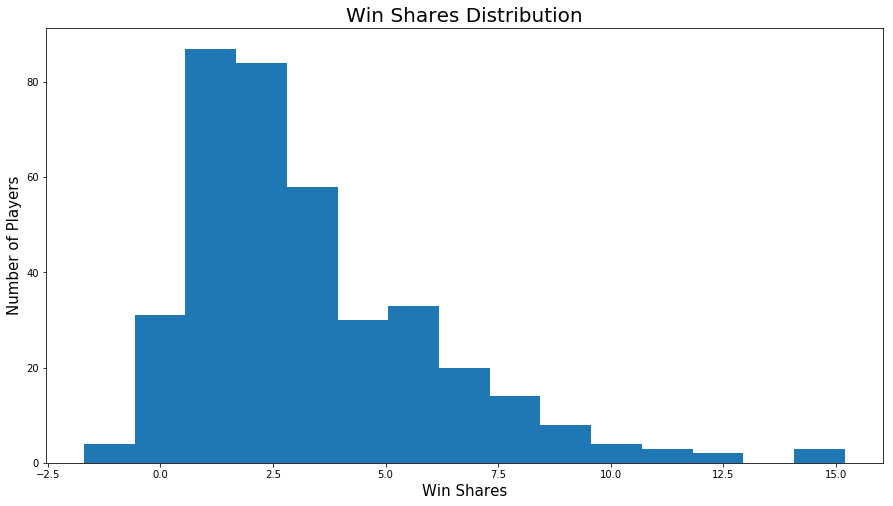

In [14]:
# There are  alot of players that have 0 WS. 
#There are 15 players in each team and need to filter out players that don't play much

nba_data = nba_data[nba_data['G'] > 41]

plt.figure(figsize = (15,8))
plt.hist(nba_data['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);

# Filter players that has played more than 41 games. So the players that don't played much are filtered out. 
# The WS distribution is normalized compared to the last one

In [15]:
nba_data.describe()
# Now there are 381 players now. 

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,OBPM,DBPM,BPM,VORP
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,26.354331,64.356955,1552.157480,14.240420,0.556152,0.366076,0.252648,4.704987,15.380052,10.043045,14.028871,1.461680,1.730709,12.052231,18.925722,3.305249,-0.420210,-0.059843,-0.484777,0.834908
std,4.233689,12.730760,631.673093,4.605968,0.047039,0.201671,0.123188,3.710341,6.233080,4.670116,8.323237,0.536658,1.501132,3.517554,5.131376,2.747444,2.146683,1.776836,2.872955,1.484185
min,19.000000,42.000000,292.000000,5.200000,0.417000,0.000000,0.046000,0.700000,5.900000,3.700000,3.800000,0.300000,0.000000,3.700000,8.000000,-1.700000,-5.500000,-4.100000,-8.400000,-2.200000
25%,23.000000,53.000000,1064.000000,11.000000,0.526000,0.251000,0.167000,2.000000,10.700000,6.400000,7.900000,1.000000,0.700000,9.700000,15.100000,1.400000,-1.700000,-1.300000,-2.300000,-0.100000
50%,26.000000,66.000000,1499.000000,13.100000,0.555000,0.388000,0.228000,3.100000,14.100000,8.700000,11.400000,1.400000,1.300000,11.500000,18.000000,2.600000,-0.600000,-0.300000,-0.800000,0.400000
75%,29.000000,76.000000,2047.000000,17.000000,0.585000,0.522000,0.310000,6.600000,19.000000,12.700000,17.900000,1.800000,2.200000,13.900000,22.100000,4.900000,0.700000,1.100000,1.000000,1.300000
max,42.000000,82.000000,3028.000000,30.900000,0.698000,0.914000,0.879000,16.800000,35.900000,25.900000,46.500000,3.400000,10.000000,26.800000,40.500000,15.200000,10.500000,5.700000,11.700000,9.900000


In [16]:
WS_corr = nba_data.corr()['WS'].reset_index()
WS_corr = WS_corr.sort_values(['WS'], ascending = False)
WS_corr
# Going to use the variables that has .5 or more for the models

,index,WS
15,WS,1.000000
19,VORP,0.924396
18,BPM,0.868633
3,PER,0.813769
16,OBPM,0.795985
2,MP,0.698498
4,TS%,0.612444
1,G,0.537833
17,DBPM,0.441935
14,USG%,0.425792


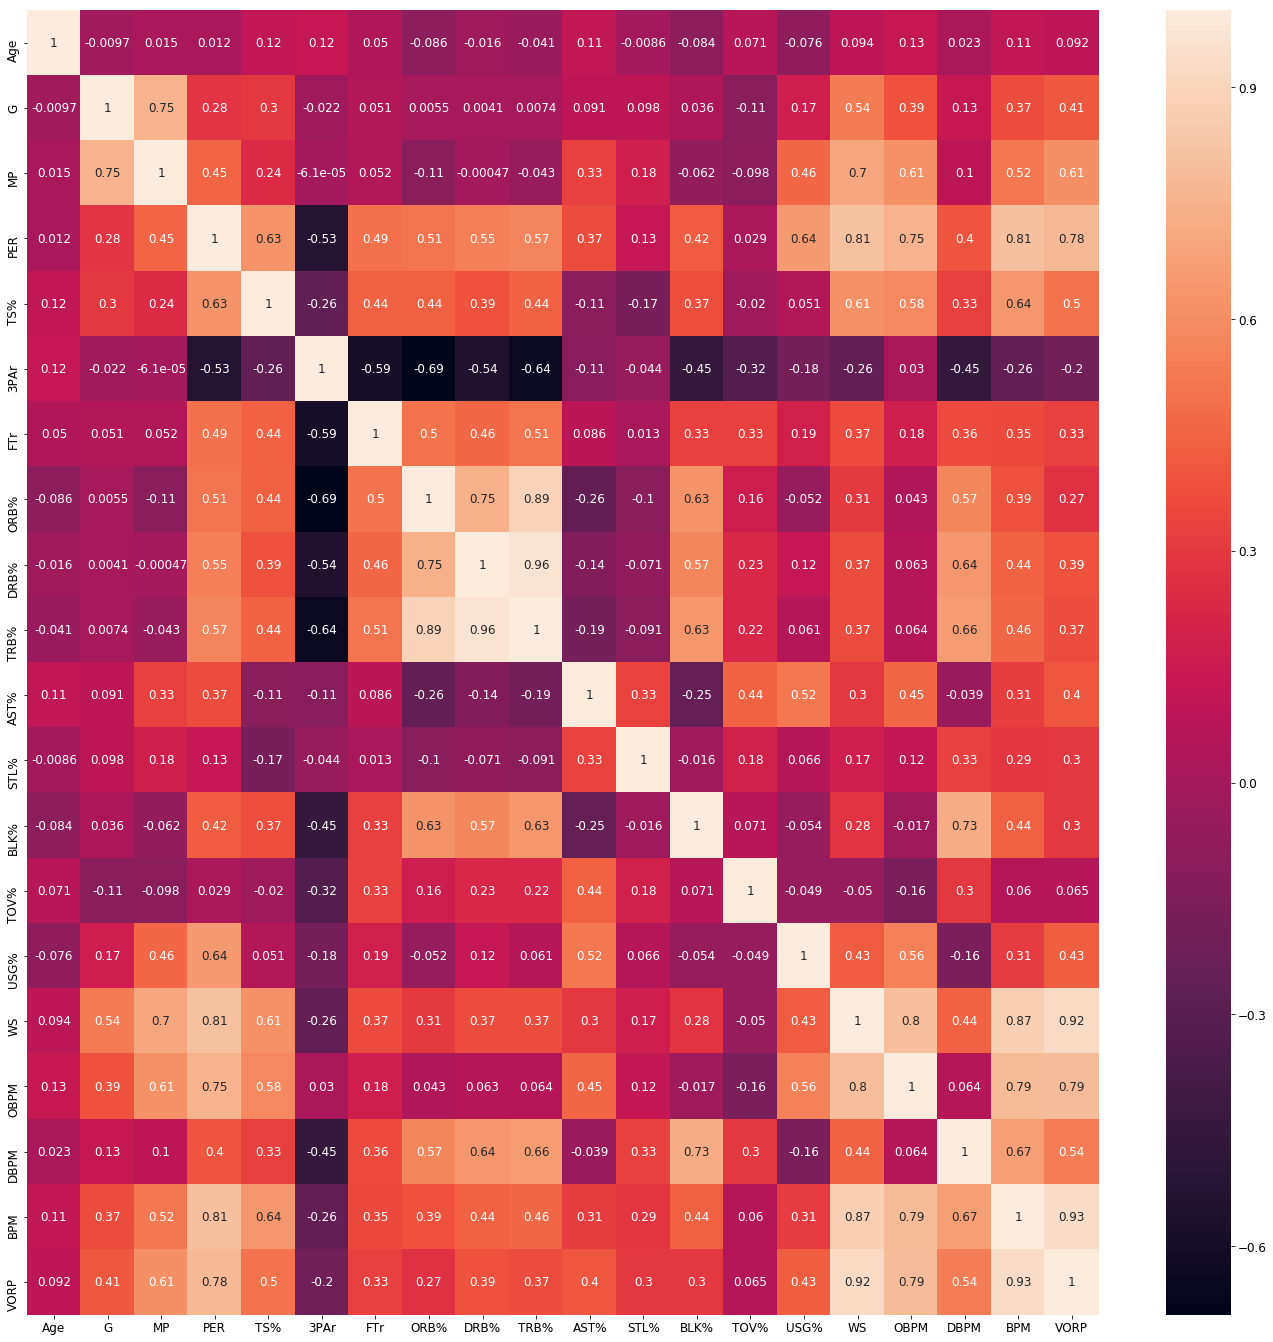

In [17]:
corr = nba_data.corr()
import seaborn as sns
plt.rcParams['figure.figsize'] = (24.0, 24.0)
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr, annot=True);
# To correlation visually. 

In [18]:
nba_data.columns

Index(['Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'WS', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

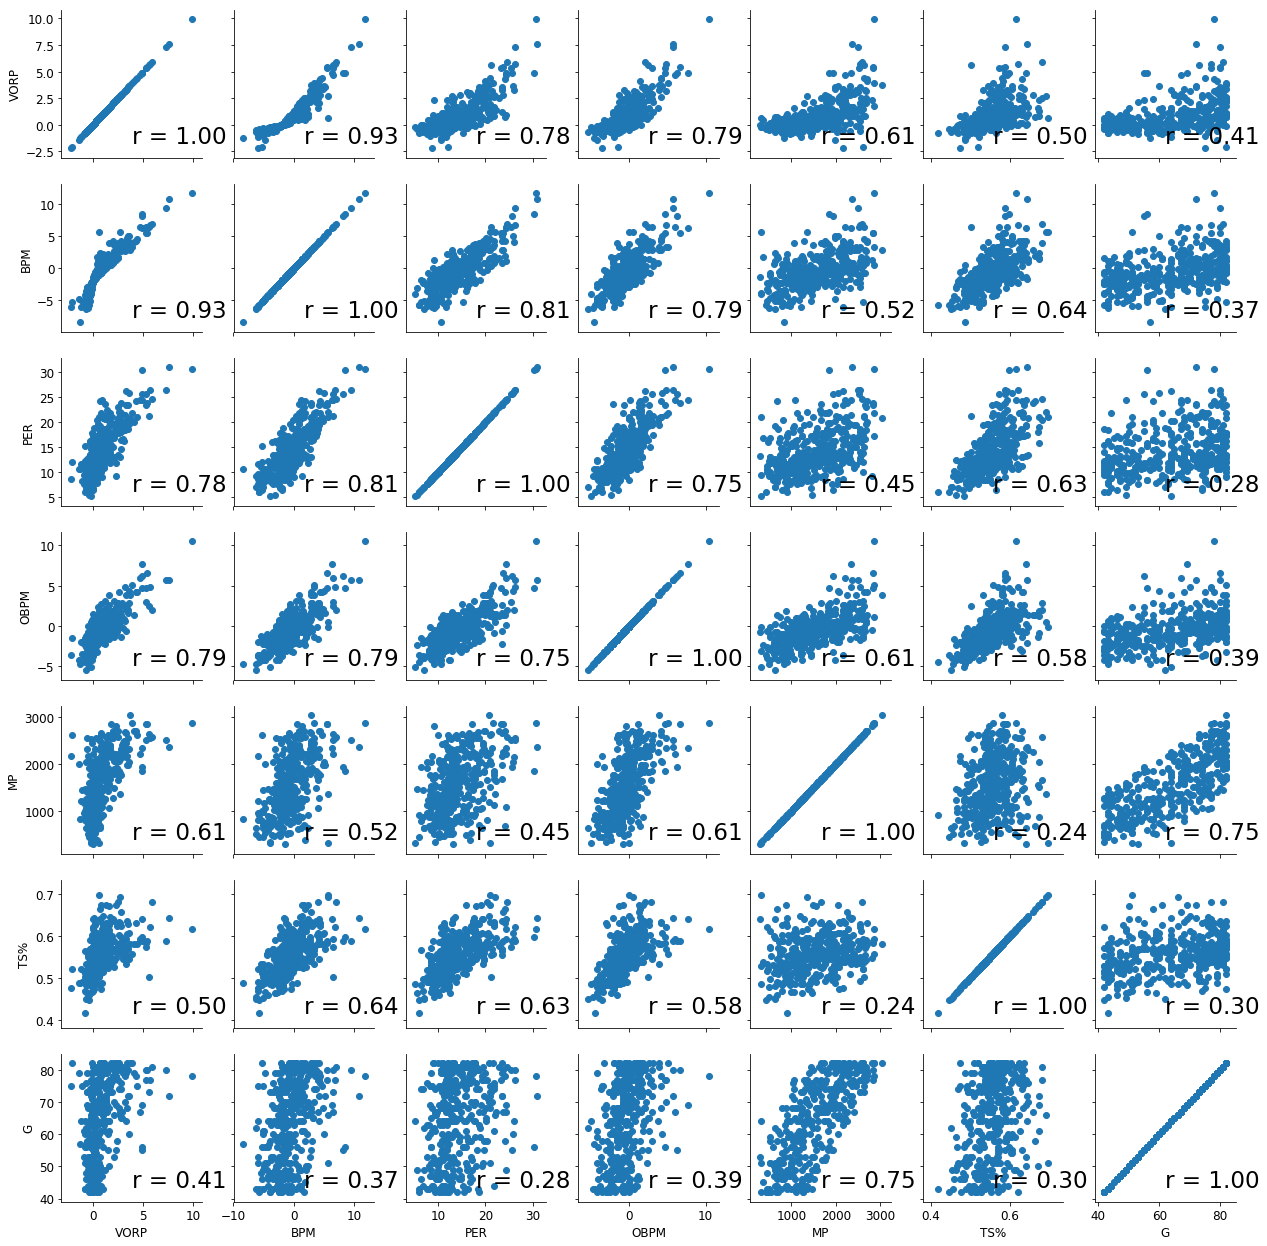

In [19]:
stats_corr = nba_data[['VORP', 'BPM', 'PER', 'OBPM', 'MP', 'TS%', 'G']]
def feature_corr(x, y, **kwargs):
    cor = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(cor),
                xy=(.5, .1),
                xycoords=ax.transAxes,
                size = 23)


plots = sb.PairGrid(stats_corr)
plots.map(plt.scatter)
plots.map(feature_corr);
# To check multicollinearity visually. 

In [20]:
stats_corr.corr()
# Checking for Multicollinearity. To see the variables are closely correlated with each other or not.

,VORP,BPM,PER,OBPM,MP,TS%,G
VORP,1.000000,0.929908,0.779450,0.794319,0.606268,0.504991,0.408920
BPM,0.929908,1.000000,0.806153,0.785744,0.521236,0.637544,0.371151
PER,0.779450,0.806153,1.000000,0.749606,0.448797,0.625866,0.281484
OBPM,0.794319,0.785744,0.749606,1.000000,0.612428,0.581164,0.387401
MP,0.606268,0.521236,0.448797,0.612428,1.000000,0.235015,0.749390
TS%,0.504991,0.637544,0.625866,0.581164,0.235015,1.000000,0.296773
G,0.408920,0.371151,0.281484,0.387401,0.749390,0.296773,1.000000


VORP vs BPM: has a very strong positive relationship (correlation of 0.93). Box Plus Minus (BPM) is a player's contribution per 100 possesions over the league average when the player was on the court. Value Over Replacement Player (VORP) takes BPM and translates it into minutes based contribution to a team. In order to calculate VORP, need to use BPM. VORP has a higher correlation with WS and uses BPM in their equation. BPM would be drop then.

There were no other correlation above 0.9. So the other variables won't be drop.

In [21]:
# Y is the target variable, in other words what are trying to predict.
Y = nba_data['WS']

# X is the feature set we are using to predict the WS
X = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 304
The number of observations in test set is 77


In [22]:
# Create the Linear Regression model

linReg = linear_model.LinearRegression()
linReg.fit(X_train, y_train)

linReg.predict(X_test)

y_lin_pred = linReg.predict(X_test)

print('Score: %.3f' % linReg.score(X_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_lin_pred))
print('Variance score: %.3f' % r2_score(y_test, y_lin_pred))

Score: 0.930
Mean squared error: 0.360
Mean Absolute error: 0.448
Variance score: 0.926


In [23]:
# Create the Support Vector Regression model

svr = SVR(kernel='rbf', gamma=1e-3, C=150, epsilon=0.3)
svr.fit(X_train, y_train.values.ravel())

y_svr_pred = svr.predict(X_test)

print('Score: %.3f' % svr.score(X_train, y_train))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_svr_pred))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_svr_pred))
print('Variance score: %.3f' % r2_score(y_test, y_svr_pred))

Score: 0.988
Mean squared error: 2.878
Mean Absolute error: 1.270
Variance score: 0.406


In [24]:
# Create the k-nearest Neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'uniform')
knn.fit(X_train, y_train)

y_knn = knn.predict(X_test)

print('Score: %.3f' % knn.score(X_train, y_train))
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_knn))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_knn))
print('Variance Score: %.3f' % r2_score(y_test, y_knn))

Score: 0.626
Mean Squared Error: 3.560
Mean Absolute error: 1.332
Variance Score: 0.265


In [31]:
# Create Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
print('Score: %.3f' % rf.score(X_train, y_train))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_rf))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_rf))
print('Variance score: %.3f' % r2_score(y_test, y_rf))

Score: 0.989
Mean squared error: 0.331
Mean Absolute error: 0.451
Variance score: 0.932


In [26]:
ws = nba_data[['Player', 'WS']]

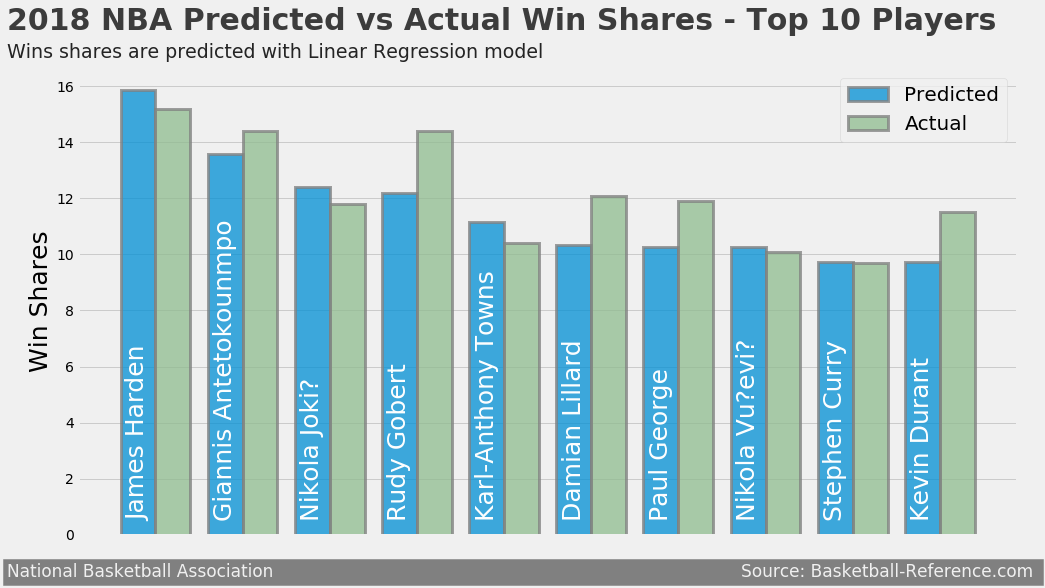

In [27]:
lin_new = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

lin_pred = linReg.predict(lin_new)

lin_names = nba_data.iloc[:, 0]
a = []
for i, j in zip(lin_pred, lin_names):
    a.append({'WS_pred':i,'Player':j})

lin_wins = pd.DataFrame(a)
lin_wins['WS_pred'] = round(lin_wins['WS_pred'].astype(float),2)

lin_wins = lin_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
lin_wins = lin_wins.merge(ws, on = 'Player', how = 'inner')


pos = np.arange(len(lin_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, lin_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, lin_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = lin_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2018 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Linear Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

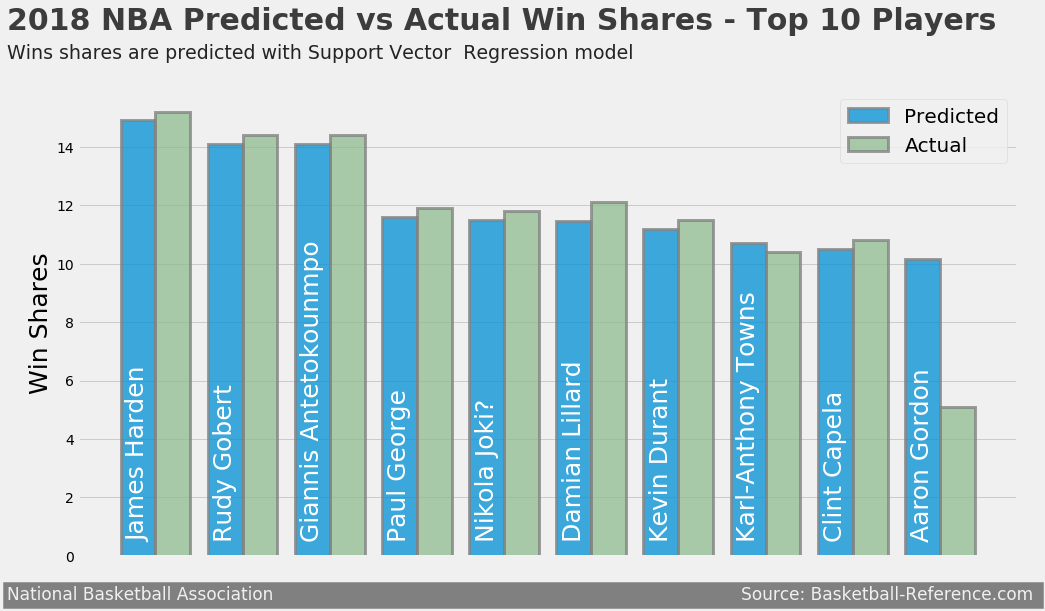

In [28]:
svr_new = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

svr_pred = svr.predict(svr_new)

svr_names = nba_data.iloc[:, 0]
a = []
for i, j in zip(svr_pred, svr_names):
    a.append({'WS_pred':i,'Player':j})

svr_wins = pd.DataFrame(a)
svr_wins['WS_pred'] = round(svr_wins['WS_pred'].astype(float),2)

svr_wins = svr_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
svr_wins = svr_wins.merge(ws, on = 'Player', how = 'inner')


pos = np.arange(len(svr_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, svr_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, svr_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = svr_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2018 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Support Vector  Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

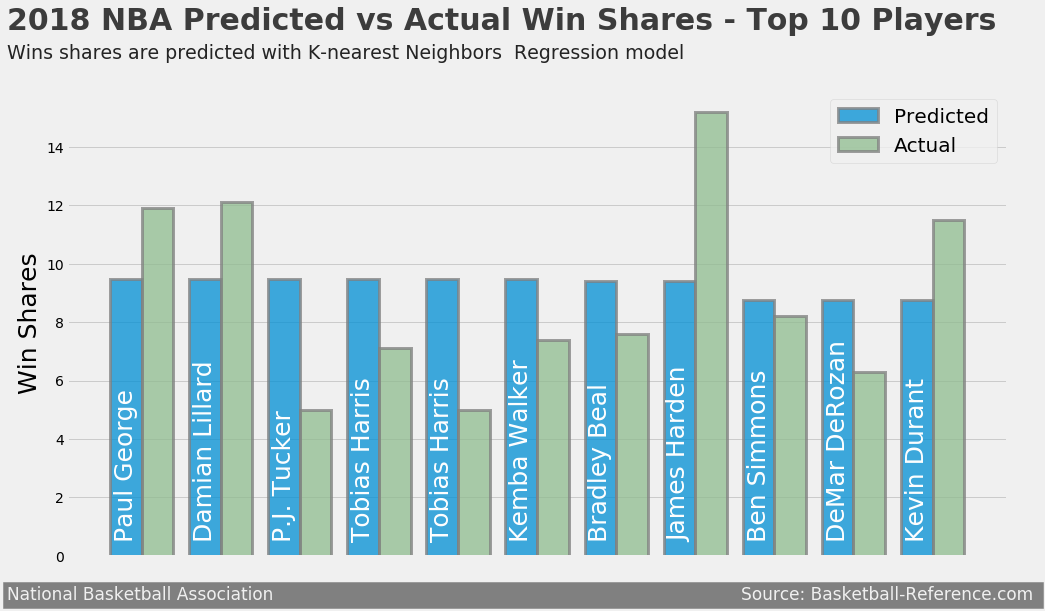

In [29]:
knn_new = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

knn_pred = knn.predict(knn_new)

knn_names = nba_data.iloc[:, 0]
a = []
for i, j in zip(knn_pred, knn_names):
    a.append({'WS_pred':i,'Player':j})

knn_wins = pd.DataFrame(a)
knn_wins['WS_pred'] = round(knn_wins['WS_pred'].astype(float),2)

knn_wins = knn_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
knn_wins = knn_wins.merge(ws, on = 'Player', how = 'inner')


pos = np.arange(len(knn_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, knn_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, knn_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = knn_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2018 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with K-nearest Neighbors  Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

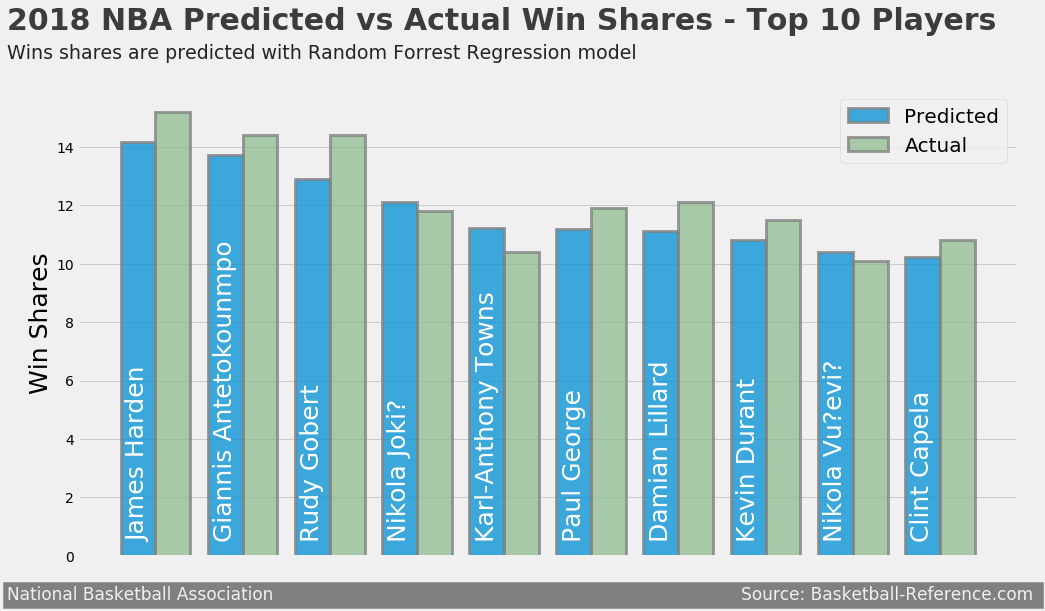

In [30]:
rf_new = nba_data[['VORP', 'PER', 'OBPM', 'MP', 'TS%', 'G']]

rf_pred = rf.predict(rf_new)

rf_names = nba_data.iloc[:, 0]
a = []
for i, j in zip(rf_pred, rf_names):
    a.append({'WS_pred':i,'Player':j})

rf_wins = pd.DataFrame(a)
rf_wins['WS_pred'] = round(rf_wins['WS_pred'].astype(float),2)

rf_wins = rf_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
rf_wins = rf_wins.merge(ws, on = 'Player', how = 'inner')


pos = np.arange(len(rf_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, rf_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, rf_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = rf_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2018 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Random Forrest Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);